In [109]:
from scipy.optimize import curve_fit
from scipy import stats
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Image, IFrame, HTML
import scipy.constants as const
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
#from negotovost import Negotovost

In [110]:
Ic_od_Vbc = pd.read_excel('./podatki/Bolzt_meritve.ods',skiprows=9,usecols="A:D",names=['Vbe','Ic1','Ic2','Ic3'])
#Ic_od_Vbc

In [111]:
def lin_fit(x,a,b):
    return a*x + b

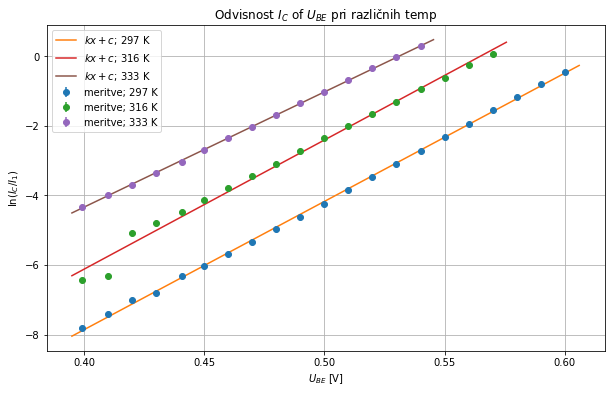

In [112]:
parameters = []
errors = []

temps = [297,316,333]

for i,x in enumerate(['Ic1','Ic2','Ic3']):

    new_pd = pd.DataFrame()
    new_pd['Vbe'] = Ic_od_Vbc['Vbe']
    new_pd[x] = Ic_od_Vbc[x]

    new_pd = new_pd.dropna()

    y = np.log(new_pd[x])
    x = new_pd['Vbe']

    params = curve_fit(lin_fit, x, y)
    a,b = params[0]

    # CALCULATE ERRORS FROM MATRIX
    errs = np.sqrt(np.diag(params[1]))
    #print(a)

    parameters.append(params[0])
    errors.append(errs)

    x_theoretical = np.linspace(min(x)*0.99,max(x)*1.01)
    y_theoretical = lin_fit(x_theoretical,a,b)

    plt.errorbar(x, y, yerr=0,fmt='o',label=f'meritve; {temps[i]} K')
    plt.plot(x_theoretical, y_theoretical,label=f'$kx+c$; {temps[i]} K')

#print(parameters,errors)

plt.title(r'')
plt.ylabel(r'$\ln(I_C / I_1)$')
plt.xlabel(r'$U_{BE}$ [V]')

plt.title('Odvisnost $I_C$ of $U_{BE}$ pri različnih temp')

plt.grid()
plt.legend()
plt.savefig('./I_C_U_BE.png',dpi=250)
plt.show()

In [113]:
params = pd.DataFrame()
params['T'] = temps
params['k'],params['dk'] = [x[0] for x in parameters],[x[0] for x in errors]
params['c'],params['dc'] = [x[1] for x in parameters],[x[1] for x in errors]

In [114]:
params['e_0/k_b'] = params['k']/params['T']
params['d e_0/k_b'] = params['dk']/params['T']
params['d e_0/k_b'] = params['d e_0/k_b']/params['e_0/k_b']

print(params.to_latex(escape=False,caption='Tabela po metodi 1',index=False,float_format="%.4f"))

\begin{table}
\centering
\caption{Tabela po metodi 1}
\begin{tabular}{rrrrrrr}
\toprule
  T &       k &     dk &        c &     dc &  e_0/k_b &  d e_0/k_b \\
\midrule
297 & 36.8858 & 0.2016 & -22.6149 & 0.1015 &   0.1242 &     0.0055 \\
316 & 37.1433 & 0.8986 & -20.9786 & 0.4383 &   0.1175 &     0.0242 \\
333 & 33.1255 & 0.1455 & -17.5875 & 0.0687 &   0.0995 &     0.0044 \\
\bottomrule
\end{tabular}
\end{table}



In [115]:
(np.mean(params['e_0/k_b'])/const.e)**-1,(stats.sem(params['e_0/k_b'])/np.mean(params['e_0/k_b']))

(1.4086598134634e-18, 0.06492866449476035)

In [116]:
const.Boltzmann

1.380649e-23

## Drugi del

In [142]:
Ic_od_T = pd.read_excel('./podatki/Bolzt_meritve.ods',skiprows=9,usecols="A:D",names=['T','dT','Ic1','Ic2'],sheet_name=1)
#Ic_od_T

No handles with labels found to put in legend.


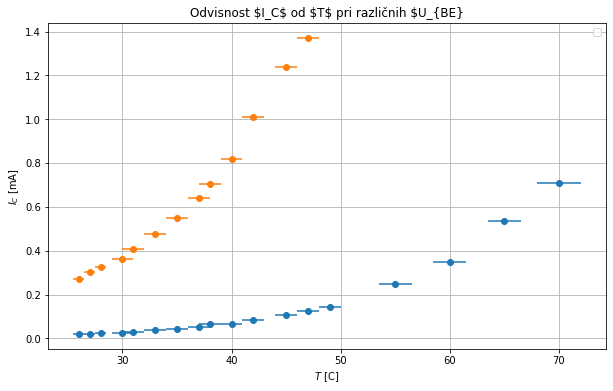

In [152]:
plt.errorbar(Ic_od_T['T'],Ic_od_T['Ic1'],xerr=Ic_od_T['dT'],fmt='o')
plt.errorbar(Ic_od_T['T'],Ic_od_T['Ic2'],xerr=Ic_od_T['dT'],fmt='o')

plt.ylabel(r'$I_C$ [mA]')
plt.xlabel(r'$T$ [C]')

plt.title('Odvisnost $I_C$ od $T$ pri različnih $U_{BE}')

plt.grid()
plt.legend()
plt.savefig('./I_C_T_lin.png',dpi=250)
plt.show()

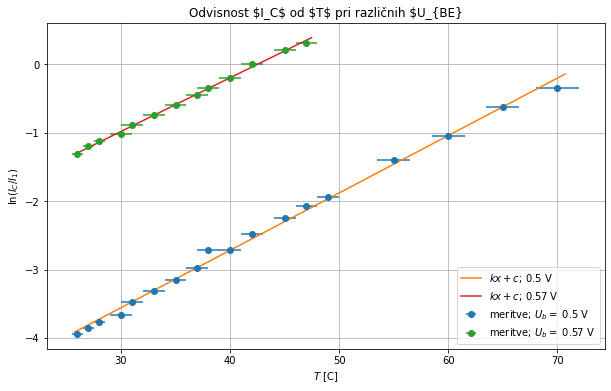

In [143]:
Ube = [0.5,0.57]

parameters = []
errors = []

for i,x in enumerate(['Ic1','Ic2']):

    new_pd = pd.DataFrame()
    new_pd['T'] = Ic_od_T['T']
    new_pd['dT'] = Ic_od_T['dT']
    new_pd[x] = Ic_od_T[x]

    new_pd = new_pd.dropna()

    y = np.log(new_pd[x])
    x = new_pd['T']

    params = curve_fit(lin_fit, x, y)
    a,b = params[0]

    # CALCULATE ERRORS FROM MATRIX
    errs = np.sqrt(np.diag(params[1]))
    #print(a)

    parameters.append(params[0])
    errors.append(errs)

    x_theoretical = np.linspace(min(x)*0.99,max(x)*1.01)
    y_theoretical = lin_fit(x_theoretical,a,b)

    plt.errorbar(x, y, xerr=new_pd['dT'],fmt='o',label=f'meritve; $U_b=$ {Ube[i]} V')
    plt.plot(x_theoretical, y_theoretical,label=f'$kx+c$; {Ube[i]} V')

#print(parameters,errors)

plt.ylabel(r'$\ln(I_C / I_1)$')
plt.xlabel(r'$T$ [C]')

plt.title('Odvisnost $I_C$ od $T$ pri različnih $U_{BE}')

plt.grid()
plt.legend()
plt.savefig('./I_C_T.png',dpi=250)
plt.show()

In [144]:
params = pd.DataFrame()
params['U_{be}'] = Ube
params['k'],params['dk'] = [x[0] for x in parameters],[x[0] for x in errors]
params['c'],params['dc'] = [x[1] for x in parameters],[x[1] for x in errors]

In [147]:
print(params.to_latex(escape=False,caption='Tabela po metodi 1',index=False,float_format="%.3f"))

\begin{table}
\centering
\caption{Tabela po metodi 1}
\begin{tabular}{rrrrr}
\toprule
 U_{be} &     k &    dk &      c &    dc \\
\midrule
  0.500 & 0.084 & 0.001 & -6.071 & 0.058 \\
  0.570 & 0.078 & 0.001 & -3.334 & 0.037 \\
\bottomrule
\end{tabular}
\end{table}

